In [9]:
import torch
from typing import Tuple
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
def sgd_factorise_ad(A: torch.Tensor, rank: int, num_epochs=1000, lr=0.01) \
    -> Tuple[torch.Tensor, torch.Tensor]:
    
    m, n = A.shape
    U = torch.rand(m, rank, requires_grad=True)
    V = torch.rand(n, rank, requires_grad=True)
    for epoch in range(0, num_epochs):
        
        U.grad = None
        V.grad = None
        
        error  = torch.nn.functional.mse_loss(A, U@V.t(), reduction='sum')
        error.backward()
        
        u = U.data - U.grad*lr
        U.data = u
        
        v = V.data - V.grad*lr
        V.data = v
        
    return U, V

In [11]:
def truncatedSVD(A: torch.Tensor):

    U, S, V = torch.svd(A)
    m = S.shape[0] -1
    S[m] = 0
    return  U, S, V

In [12]:
original = torch.tensor([[0.3374, 0.6005, 0.1735],
                         [3.3359, 0.0492, 1.8374],
                         [2.9407, 0.5301, 2.2620]])

U, V = sgd_factorise_ad(original, 2)
loss = torch.nn.functional.mse_loss(U@V.t(), original, reduction='sum')
print(f"Approximation {U@V.t()}")
print(f'Loss  is {loss}')\

Approximation tensor([[ 0.2252,  0.5233,  0.3579],
        [ 3.2521, -0.0085,  1.9751],
        [ 3.0387,  0.5975,  2.1011]], grad_fn=<MmBackward>)
Loss  is 0.12191718816757202


In [13]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases'
                 + '/iris/iris.data', header=None)
data = torch.tensor(df.iloc[:, [0,1,2,3]].values)
data = data - data.mean(dim=0) # centre the data 

U, V = sgd_factorise_ad(data, 2)
loss = torch.nn.functional.mse_loss(U@V.t(), data, reduction='sum')
#print(f"Approximation {U@V.t()}")
print(f'Loss  is {loss}')\


Loss  is 15.230071071144733


In [14]:
U, S , V = truncatedSVD(data)
reconstruction = U @ torch.diag(S) @ V.t()
loss = torch.nn.functional.mse_loss(reconstruction, data, reduction='sum')
#print(f"Approximation \n {reconstruction}")
print(f'Loss  is {loss}')

Loss  is 3.528771041774291


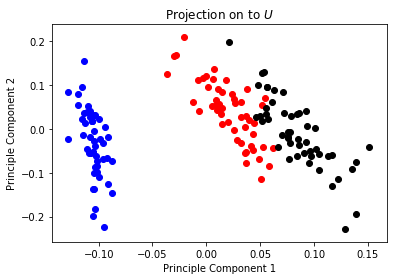

In [15]:
U, S, V = torch.svd(data)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['blue','red','black']
#plt.scatter(U[:,0], U[:,1])
colour_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
for i in range(data.shape[0]):
    ax.scatter(U[i,0], U[i,1], color= colors[colour_dict[df.iloc[i,-1]]])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Projection on to $U$")
plt.savefig("PCA_U")

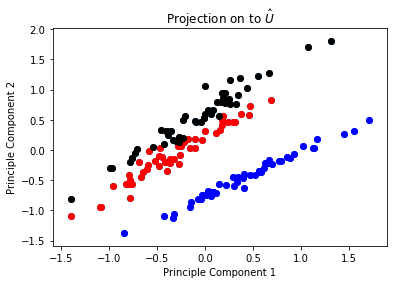

In [16]:
U, V = sgd_factorise_ad(data, 2)
U = U.data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['blue','red','black']
plt.scatter(U[:,0], U[:,1])
colour_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
for i in range(data.shape[0]):
    ax.scatter(U[i,0], U[i,1], color= colors[colour_dict[df.iloc[i,-1]]])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Projection on to $\hat{U}$")
plt.savefig("PCA_U_2")